Data Manipulation

In [1]:
#importing pyspark
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('amad295_BDAS').getOrCreate()

In [2]:
#import pandas
import pandas as pd
#reading csv file with pandas
dfpd = pd.read_csv('database.csv')

/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#displays top 5 rows helpful for describing the data
dfpd.head()

,Record_ID,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,NaN
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,NaN
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,NaN
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,NaN
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,NaN


In [4]:
#changing the data type fo a particular column to integer from string.
#import numpy
import numpy as np
dfpd.Perpetrator_Age = pd.to_numeric(dfpd.Perpetrator_Age, errors = 'coerce').fillna(0).astype(np.int64)

In [5]:
#constructing new victim race columns with numerical values
def transformed_victimrace(race):
    if race == 'Unknown':
        return 0
    if race == 'Black':
        return 1
    if race == 'White':
        return 2
    if race == 'Asian/Pacific Islander':
        return 3
    if race == 'Native American/Alaska Native':
        return 4

In [6]:
dfpd['Transformed_VictimRace'] = dfpd['Victim_Race'].apply(transformed_victimrace)

In [7]:
#constructing new perpetrator race columns with numerical values
def transformed_perpetratorrace(race):
    if race == 'Unknown':
        return 0
    if race == 'Black':
        return 1
    if race == 'White':
        return 2
    if race == 'Asian/Pacific Islander':
        return 3
    if race == 'Native American/Alaska Native':
        return 4

In [8]:
dfpd['Transformed_PerpetratorRace'] = dfpd['Perpetrator_Race'].apply(transformed_perpetratorrace)
dfpd.head()

,Record_ID,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source,Transformed_VictimRace,Transformed_PerpetratorRace
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,NaN,4,4
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,42,White,Unknown,Acquaintance,Strangulation,0,0,NaN,2,2
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,0,Unknown,Unknown,Unknown,Unknown,0,0,NaN,4,0
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,42,White,Unknown,Acquaintance,Strangulation,0,0,NaN,2,2
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,0,Unknown,Unknown,Unknown,Unknown,0,1,NaN,4,0


In [9]:
dfpd.drop(columns=['Record_ID','Agency_Code','Agency_Name','Agency_Type','Perpetrator_Ethnicity','Record_Source'],axis=1,inplace=True)

In [10]:
dfpd.shape

(638454, 20)

In [11]:
#importing matplotlib for visualizing
import matplotlib.pyplot as plt
%matplotlib inline

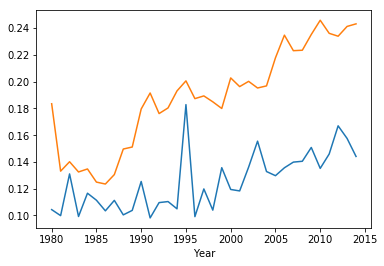

In [12]:
dfpd.groupby('Year').Victim_Count.mean().plot()
dfpd.groupby('Victim_Race').Victim_Age.mean()
dfpd.groupby('Perpetrator_Race').Perpetrator_Age.mean()
dfpd.groupby('Year').Perpetrator_Count.mean().plot()

In [13]:
dfpd = dfpd.drop(["Crime_Type", "Victim_Ethnicity","Incident","Relationship","Transformed_VictimRace"], axis=1)

In [14]:
dfpd.shape

(638454, 15)

Machine Learning

Importing the cleaned and transformed dataset through pyspark

In [15]:
df = spark.read.csv('Homicide.csv',header=True,inferSchema=True)
df.show()

+----+--------+----------+--------------------+---------------+--------------------+------------+-----------------+
|Year|Incident|Victim_Age|         Victim_Race|Perpetrator_Age|    Perpetrator_Race|Victim_Count|Perpetrator_Count|
+----+--------+----------+--------------------+---------------+--------------------+------------+-----------------+
|1980|       1|        14|Native American/A...|             15|Native American/A...|           0|                0|
|1980|       1|        43|               White|             42|               White|           0|                0|
|1980|       2|        30|Native American/A...|              0|             Unknown|           0|                0|
|1980|       1|        43|               White|             42|               White|           0|                0|
|1980|       2|        30|Native American/A...|              0|             Unknown|           0|                1|
|1980|       1|        30|               White|             36|         

In [16]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Victim_Age: integer (nullable = true)
 |-- Victim_Race: string (nullable = true)
 |-- Perpetrator_Age: integer (nullable = true)
 |-- Perpetrator_Race: string (nullable = true)
 |-- Victim_Count: integer (nullable = true)
 |-- Perpetrator_Count: integer (nullable = true)



In [17]:
from pyspark.sql import *
spark = SparkSession.builder.appName('Final1').getOrCreate()

In [18]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

Goal 2

In [19]:
VicAge_indexer = StringIndexer(inputCol='Victim_Age',outputCol='VicAge')
PerpAge_indexer = StringIndexer(inputCol='Perpetrator_Age',outputCol='PerpAge')
VicCount_indexer = StringIndexer(inputCol='Victim_Count',outputCol='VicCount')
PerpCount = StringIndexer(inputCol='Perpetrator_Count',outputCol='PerpCount')
VicRace_indexer = StringIndexer(inputCol='Perpetrator_Race',outputCol='label')

VicAge_encoder = OneHotEncoder(inputCol='VicAge',outputCol='VicAgeVec')
PerpAge_encoder = OneHotEncoder(inputCol='PerpAge',outputCol='PerpAgeVec')
VicCount_encoder = OneHotEncoder(inputCol='VicCount',outputCol='VicCountVec')
PerpCount_encoder = StringIndexer(inputCol='PerpCount',outputCol='PerpCountVec')
label_encoder = StringIndexer(inputCol='label',outputCol='label')

assembler = VectorAssembler(inputCols=['VicAgeVec','PerpAgeVec','VicCountVec','PerpCountVec'], outputCol="features")

In [20]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[VicAge_indexer,PerpAge_indexer,VicCount_indexer,PerpCount,VicRace_indexer,
                            VicAge_encoder,PerpAge_encoder,VicCount_encoder,PerpCount_encoder,assembler])

In [21]:
pipeline_model = pipeline.fit(df)
pipe_df = pipeline_model.transform(df)
pipe_df = pipe_df.select('label','features')
pipe_df.describe()

DataFrame[summary: string, label: string]

Splitting the Data

In [22]:
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 34904
Test Dataset Count: 15095


In [23]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator

Random Forest Classifier

In [24]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)


In [25]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [26]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.6271613116926135


Naive Bayes

In [27]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=0.5, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

# compute accuracy on the test set
#evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
#print("Test set accuracy = " + str(accuracy))

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5319687015814835


Logistic Regression

In [28]:
##Logistics Regression##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Training Dataset Count: 39996
Test Dataset Count: 10003
Test set accuracy = 0.6485054483654904


One Vs Rest

In [29]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# generate the train/test split.
(train_data, test_data) = pipe_df.randomSplit([0.7, 0.3])

# instantiate the base classifier.
lr = LogisticRegression(maxIter=5, tol=1E-6, fitIntercept=True)

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# train the multiclass model.
ovrModel = ovr.fit(train_data)

# score the model on test data.
predictions = ovrModel.transform(test_data)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Test accuracy = %g" % (1.0 - accuracy))

Test accuracy = 0.356858


Goal 1

In [30]:
VicAge_indexer = StringIndexer(inputCol='Victim_Age',outputCol='VicAge')
PerpAge_indexer = StringIndexer(inputCol='Perpetrator_Age',outputCol='PerpAge')
VicCount_indexer = StringIndexer(inputCol='Victim_Count',outputCol='VicCount')
PerpCount = StringIndexer(inputCol='Perpetrator_Count',outputCol='PerpCount')
VicRace_indexer = StringIndexer(inputCol='Victim_Race',outputCol='label')

VicAge_encoder = OneHotEncoder(inputCol='VicAge',outputCol='VicAgeVec')
PerpAge_encoder = OneHotEncoder(inputCol='PerpAge',outputCol='PerpAgeVec')
VicCount_encoder = OneHotEncoder(inputCol='VicCount',outputCol='VicCountVec')
PerpCount_encoder = StringIndexer(inputCol='PerpCount',outputCol='PerpCountVec')
label_encoder = StringIndexer(inputCol='label',outputCol='label')

assembler = VectorAssembler(inputCols=['VicAgeVec','PerpAgeVec','VicCountVec','PerpCountVec'], outputCol="features")

In [31]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[VicAge_indexer,PerpAge_indexer,VicCount_indexer,PerpCount,VicRace_indexer,
                            VicAge_encoder,PerpAge_encoder,VicCount_encoder,PerpCount_encoder,assembler])

In [32]:
pipeline_model = pipeline.fit(df)
pipe_df = pipeline_model.transform(df)
pipe_df = pipe_df.select('label','features')
pipe_df.describe()

DataFrame[summary: string, label: string]

In [33]:
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 35066
Test Dataset Count: 14933


In [34]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [35]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)

In [36]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [37]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.5445657269135472


In [38]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=0.5, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

# compute accuracy on the test set
#evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
#print("Test set accuracy = " + str(accuracy))

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5400454484634133


In [39]:
##Logistics Regression##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Training Dataset Count: 40050
Test Dataset Count: 9949
Test set accuracy = 0.5540255302040407


In [40]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# generate the train/test split.
(train_data, test_data) = pipe_df.randomSplit([0.7, 0.3])

# instantiate the base classifier.
lr = LogisticRegression(maxIter=5, tol=1E-6, fitIntercept=True)

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# train the multiclass model.
ovrModel = ovr.fit(train_data)

# score the model on test data.
predictions = ovrModel.transform(test_data)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Test accuracy = %g" % (1.0 - accuracy))

Test accuracy = 0.440741


Note: Visulaization is done in separate notebook (Visualization.ipynb)